In [69]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
# library which is utilized for generating labels for my images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [70]:
# loading my image
img = image.load_img(r"C:\Users\user\Desktop\code\basedata\training\finished building\1.jpg")

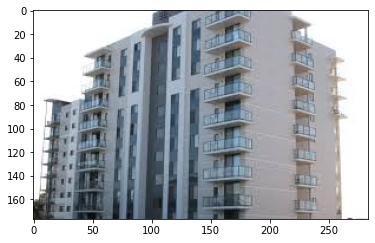

In [71]:
# showing the image
plt.imshow(img)

In [72]:
# seeing the shape
cv2.imread(r"C:\Users\user\Desktop\code\basedata\training\finished building\1.jpg").shape

(177, 284, 3)

In [73]:
# generating training and validation dataset with help of ImageDataGenerator
train = ImageDataGenerator(rescale= 1/255) # dividing all my images by 255
validation = ImageDataGenerator(rescale= 1/255)

In [74]:
# converting training images into a dataset that can be feeded to my neural network
# resizing my images into 200 * 200
train_dataset = train.flow_from_directory(r'C:\Users\user\Desktop\code\basedata\training',
                                         target_size= (200, 200),
                                         batch_size = 3,
                                         class_mode = 'binary')
# generating the same thing for validation dataset
validation_dataset = validation.flow_from_directory(r'C:\Users\user\Desktop\code\basedata\validation',
                                         target_size= (200, 200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 39 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [75]:
# seeing the labels and data generated
train_dataset.class_indices

{'finished building': 0, 'unfinished construction': 1}

In [76]:
# converted all the classes present in dataset into numerical value
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [77]:
# defining my model
# convolution layer and maxpooling layer 
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200, 200, 3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    # flattening
                                    tf.keras.layers.Flatten(),
                                    
                                    # optimization layers
                                    tf.keras.layers.Dense(512, activation= 'relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')                                   
])

In [78]:
# compiling my model
model.compile(loss= 'binary_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              metrics = ['accuracy'])

In [79]:
# fitting the model
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 50,
                     validation_data= validation_dataset)

Epoch 1/50
5/5 [==============================] - 8s 1s/step - loss: 3.6918 - accuracy: 0.4000 - val_loss: 0.8028 - val_accuracy: 0.5128
Epoch 2/50
5/5 [==============================] - 3s 591ms/step - loss: 0.7999 - accuracy: 0.4000 - val_loss: 0.6452 - val_accuracy: 0.5641
Epoch 3/50
5/5 [==============================] - 3s 587ms/step - loss: 0.6595 - accuracy: 0.6000 - val_loss: 0.5690 - val_accuracy: 0.7179
Epoch 4/50
5/5 [==============================] - 3s 546ms/step - loss: 0.5740 - accuracy: 0.8000 - val_loss: 0.3374 - val_accuracy: 0.9744
Epoch 5/50
5/5 [==============================] - 3s 551ms/step - loss: 1.6691 - accuracy: 0.7333 - val_loss: 0.5935 - val_accuracy: 0.5128
Epoch 6/50
5/5 [==============================] - 3s 584ms/step - loss: 0.4653 - accuracy: 0.8667 - val_loss: 0.3400 - val_accuracy: 0.9744
Epoch 7/50
5/5 [==============================] - 3s 595ms/step - loss: 0.4152 - accuracy: 0.8000 - val_loss: 0.2661 - val_accuracy: 1.0000
Epoch 8/50
5/5 [=======

In [80]:
# test dataset
dir_path = r'C:\Users\user\Desktop\code\basedata\test'

for i in os.listdir(dir_path):
    print(i)

1.jpg
10.jpg
2.jpg
3.jpg
5.jpg
7.jpg
8.jpg
9.jpg


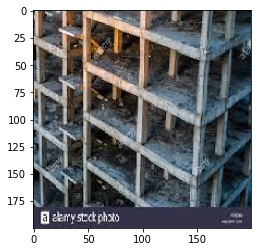

the building is finished


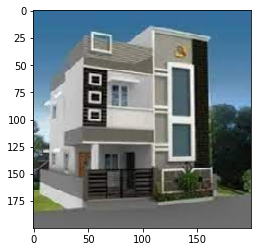

the building is finished


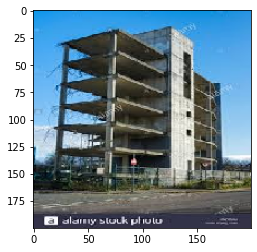

the building is unfinished


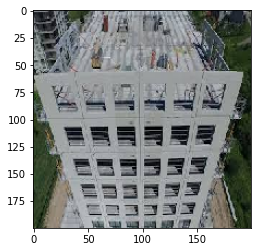

the building is unfinished


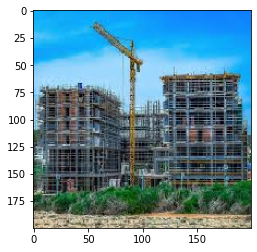

the building is unfinished


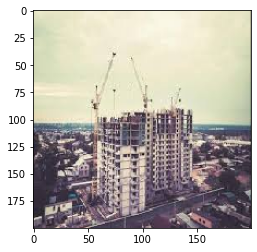

the building is unfinished


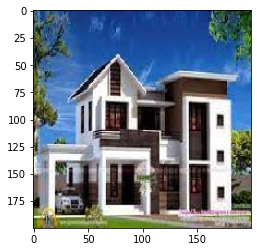

the building is unfinished


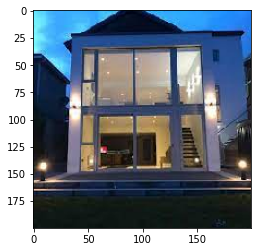

the building is finished


In [81]:
# test dataset
dir_path = r'C:\Users\user\Desktop\code\basedata\test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    # converting image to array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # vertically joining those images
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print("the building is finished")
    else:
        print("the building is unfinished")